Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


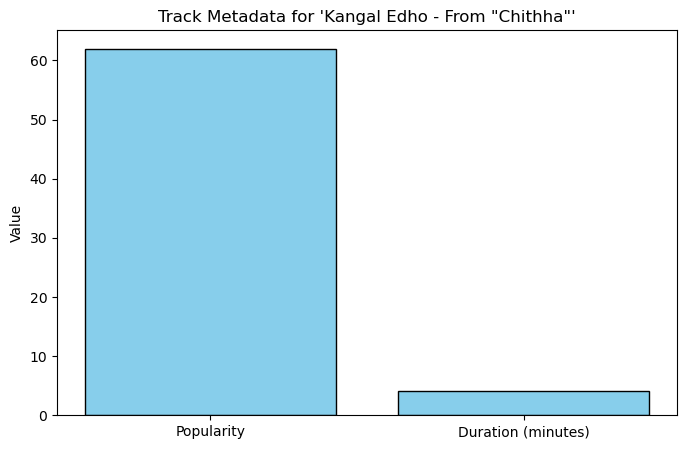

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import re

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='ae26c1ff0df1430bbd331c4124206bf2',
    client_secret='9d8bef641c93428ab1288c91507f4468'
))

playlist_url = "https://open.spotify.com/playlist/4jkj4pKrkUb52zbFkwC52N?si=c329b374bb994777"

playlist_id = re.search(r'playlist/([a-zA-Z0-9]+)', playlist_url).group(1)

playlist = sp.playlist(playlist_id)
tracks = playlist['tracks']['items']

track_data_list = []

for item in tracks:
    track = item['track']
    track_data = {
        'Track Name': track['name'],
        'Artist': track['artists'][0]['name'],
        'Album': track['album']['name'],
        'Popularity': track['popularity'],
        'Duration (minutes)': track['duration_ms'] / 60000
    }
    track_data_list.append(track_data)

df = pd.DataFrame(track_data_list)

df.to_csv('spotify_playlist_data.csv', index=False)

features = ['Popularity', 'Duration (minutes)']
values = [df.at[0, 'Popularity'], df.at[0, 'Duration (minutes)']]

plt.figure(figsize=(8, 5))
plt.bar(features, values, color='skyblue', edgecolor='black')
plt.title(f"Track Metadata for '{df.at[0, 'Track Name']}'")
plt.ylabel('Value')
plt.show()
